# Data Cleaning

**The first part of any Data Analysis process is Data Cleaning,in this project,I have applied Data Cleaning in three steps:**

1.Number of guests had negative values,which is an error,fixed it.

2.Removed outliers from Revenue Generated & Revenue Realized column.

3.Handled NaN values on ratings_given column.

***Methods used for Data preprocessing,inspection and Cleaning***:
1. .describe()
2. .min()
3. .max()
4. .mean()
5. .std()
6. .isnull()
7. 68-95-99.7 rule to exclude outliers.

In [66]:
#Uploading the necessarylibraries:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [67]:
#Uploading the FataFrames:
df_bookings = pd.read_csv('D:\\fact_bookings.csv')
df_hotels = pd.read_csv('D:\\dim_hotels.csv')
df_rooms = pd.read_csv('D:\\dim_rooms.csv')
df_date = pd.read_csv('D:\\dim_date.csv')
df_aggregated_bookings = pd.read_csv('D:\\fact_aggregated_bookings.csv')

**I.Cleaning the Bookings table**:

1.Describe the table to inspect data.

2.Checking and Cleaning rows where number of guests are negative.

3.Saving the Cleaned data in the same Dataframe.

In [68]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [69]:
df_bookings=df_bookings[df_bookings.no_guests>=0]
df_bookings.tail(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300
134589,Jul312217564RT410,17564,31-07-22,31-07-22,1/8/2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920


**II.a.Removing outliers from revenue_generated column using 68-95-99.7 rule**:

1.Check maximum and minimum revenue generated from bookings DataFrame.

2.Calculate upper limit and lower limit for the column by calculating mean and standard deviation.

3.Check outliers for all existing revenue entries.

4.Clean the outliers and saved it to the same DataFrame.

In [70]:
max_revenue=df_bookings.revenue_generated.max()
min_revenue=df_bookings.revenue_generated.min()
print(max_revenue)
print(min_revenue)

avg,std_dev=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
print(avg,std_dev)

higher_limit=avg+3*std_dev
print(higher_limit)

lower_limit=avg-3*std_dev
print(lower_limit)

28560000
6500
15378.036937686695 93040.1549314641
294498.50173207896
-263742.4278567056


In [71]:

df_bookings[df_bookings.revenue_generated>higher_limit]

df_bookings[df_bookings.revenue_generated<higher_limit]

df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit]
print(df_bookings)

               booking_id  property_id booking_date check_in_date  \
1        May012216558RT12        16558     30-04-22      1/5/2022   
4        May012216558RT15        16558     27-04-22      1/5/2022   
5        May012216558RT16        16558     1/5/2022      1/5/2022   
6        May012216558RT17        16558     28-04-22      1/5/2022   
7        May012216558RT18        16558     26-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134584   Jul312217564RT45        17564     30-07-22      31-07-22   
134585   Jul312217564RT46        17564     29-07-22      31-07-22   
134587   Jul312217564RT48        17564     30-07-22      31-07-22   
134588   Jul312217564RT49        17564     29-07-22      31-07-22   
134589  Jul312217564RT410        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
1           2/5/2022        2.0           RT1           others            NaN   
4        

**III.b.Removing outliers from revenue_realized column using 68-95-99.7 rule**:

1.Check maximum and minimum revenue realized from bookings DataFrame.

2.Calculate upper limit and lower limit for the column by calculating mean and standard deviation.

3.Inspect the DataFrame to realise the possibility of having valid revenue entries even when they exceed the general 68-95-99.7.

4.Presidential room types are always high end rooms in terms of price.

5.Calculate another 68-95-99.7 rule on PresidentiaL room type with high price and removed outliers(if any) separately.

6.Save it to the same DataFrame.

In [72]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [73]:
higher_limit=df_bookings.revenue_realized.mean()+3*df_bookings.revenue_realized.std()
print(higher_limit)  #it is less than  45220

33479.358661845814


In [74]:
print(df_bookings[df_bookings.revenue_realized>higher_limit])

df_rooms 

df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

               booking_id  property_id booking_date check_in_date  \
137      May012216559RT41        16559     27-04-22      1/5/2022   
139      May012216559RT43        16559     1/5/2022      1/5/2022   
143      May012216559RT47        16559     28-04-22      1/5/2022   
149     May012216559RT413        16559     24-04-22      1/5/2022   
222      May012216560RT45        16560     30-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134328   Jul312219560RT49        19560     31-07-22      31-07-22   
134331  Jul312219560RT412        19560     31-07-22      31-07-22   
134467   Jul312219562RT45        19562     28-07-22      31-07-22   
134474  Jul312219562RT412        19562     25-07-22      31-07-22   
134581   Jul312217564RT42        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
137         7/5/2022        4.0           RT4           others            NaN   
139      

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [75]:
23439.308444+3*9048.599076 
round(50585.105672000005)

50585

**III.Checking NaN Values:**

1.Check the NaN values for all the columns in bookings DataFrame and Sum the NaN values.

2.Inspect the sum for all the columns.

3.ratings_given column Can have null values since not not all customers give rating after checking out.

In [76]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

# Data Transformation
**After the necessary cleaning was done,now,we need to transform the data based on our need,data transformations may include one to a number of steps,like,adding a new column to converting column values,encoding categorical values,data aggregration,merging the DataFrames,data normalization,feature  Engineering etc.**

**in this project,Data Transformation is applied by adding a calculated column:**

Here I have Checked the aggregated_bookings DataFrame and added a new column occupancy percentage(occ_pct)

                                occ_pct=successful_bookings/capacity

Checking the DataFrame-->Adding the column-->Converting the decimal values to percentages by using the Lambda function.


***Methods used for Data Transformation***:
1. .head()
2. .apply()
3.  lambda function

In [77]:
df_aggregated_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [78]:
df_aggregated_bookings['occ_pct']=df_aggregated_bookings['successful_bookings']/df_aggregated_bookings['capacity']
print(df_aggregated_bookings)

      property_id check_in_date room_category  successful_bookings  capacity  \
0           16559      1-May-22           RT1                   25      30.0   
1           19562      1-May-22           RT1                   28      30.0   
2           19563      1-May-22           RT1                   23      30.0   
3           17558      1-May-22           RT1                   30      19.0   
4           16558      1-May-22           RT1                   18      19.0   
...           ...           ...           ...                  ...       ...   
9195        16563     31-Jul-22           RT4                   13      18.0   
9196        16559     31-Jul-22           RT4                   13      18.0   
9197        17558     31-Jul-22           RT4                    3       6.0   
9198        19563     31-Jul-22           RT4                    3       6.0   
9199        17561     31-Jul-22           RT4                    3       4.0   

       occ_pct  
0     0.833333  
1    

In [79]:
df_aggregated_bookings['occ_pct'] = df_aggregated_bookings['occ_pct'].apply(lambda x: round(x * 100, 2))
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [80]:
#Another method of adding that column is:
df_aggregated_bookings['occ_pct'] = df_aggregated_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_aggregated_bookings['occ_pct'] = df_aggregated_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_aggregated_bookings
#By running the cell again and again the pct values doesn't change here.

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


# Insight Generation

**The business questions asked in the scenarios are called ad-hoc questions,in this project we will be finding solutions of total 11 ad-hoc questions.**

***Methods used for Insight generation***:

**For calculation and insight generation:**
1. .groupby()

2. .mean()

3. .round()

4. .merge() and joins

5.  .tail() & .head()

6.  .drop()

7.  .unique()

8.  sort_values()

9.  .read_csv

10. .columns()

11. .concat()

12. .info()

13. .to_datetime()

14. .sum()

15. Unit conversion(to millions)
    
**For visualization:**

1. matplotlib.pyplot as plt()

2. seaborn as sns()

3. General matplotlib methods(e.g: .xlabel/.ylabel/.figure/.set_style etc).

4. .annotate()

5. for loops

6. .format()

**Question 1:**

**WHAT IS THE AVERAGE OCCUPANCY RATE PER ROOM TYPE?**

*Step-1  By grouping with 'room_category',average occupancy percetage/rate was calculated.*

*Step-2: After that the DataFrame,df_aggregated_bookings was merged with df_rooms to get the corrosponding room_class,named it df.*

*Step-3: The merged DataFrame was grouped by room_class and on occ_pct the average was calculated and rounded up.*

*Step-4:  Found that there are two columns with same value and different names,dropped one and finalized the desired result.*

In [81]:
df_aggregated_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [82]:
df=pd.merge(df_aggregated_bookings,df_rooms,left_on='room_category',right_on='room_id')
df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [83]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [84]:
df.drop('room_id',axis=1,inplace=True)
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


**Conclusion:**

**Presidential rooms has highest average occupancy rate,all other types of rooms have almost same average occupancy rate.**

**Question 2:**

**WHAT IS THE AVERAGE OCCUPANCY RATE PER CITY?**


*Step-1: City information is in df_hotels,so, merged df with df_hotels on the 'property_id' column to get corresponding cities.*

*Step-2: After that grouped by the 'city' column and calculated the average of occupancy percentage. and rounded up.*

In [85]:
df=pd.merge(df,df_hotels,on='property_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9195,18560,27-Jul-22,RT4,6,15.0,40.00,Presidential,Atliq City,Business,Hyderabad
9196,18560,28-Jul-22,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad
9197,18560,29-Jul-22,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad
9198,18560,30-Jul-22,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad


In [86]:
df.groupby("city")["occ_pct"].mean().round()

city
Bangalore    57.0
Delhi        62.0
Hyderabad    58.0
Mumbai       58.0
Name: occ_pct, dtype: float64

**Conclusion:**

**Delhi has the highest average occupancy rate followed by all other cities with almost same average occupancy rate.**

**Question 3:**

**WHEN WAS THE OCCUPANCY BETTER? WEEKDAY OR WEEKEND?**


*Step-1: Date information is in df_date,so, merged df with df_date on the 'check_in_date' column to get corresponding Date information.*

*Step-2: After that grouped by the 'day_type' column and calculated the average of occupancy percentage. and rounded up.*

*Step-3: Created the column chart.*

In [87]:
df_date #Check the df_date table.

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [88]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,58.82,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,73.33,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,85.00,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,70.83,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [89]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_12224\704016296.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels, color='white')


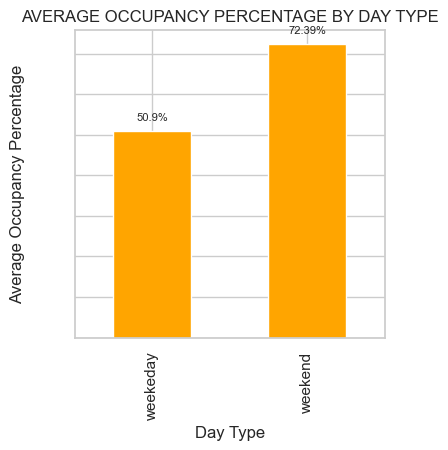

In [120]:
# Set Seaborn style
sns.set_style("whitegrid")

# Assuming df has columns 'day_type' and 'occ_pct'
plt.figure(figsize=(4, 4))

# Group by 'day_type' and calculate the mean of 'occ_pct'
avg_occ_pct = df.groupby('day_type')['occ_pct'].mean().round(2)

# Plotting
ax = avg_occ_pct.plot(kind='bar', color='orange')

yticks = ax.get_yticks()
yticklabels = ['{}%'.format(int(x)) for x in yticks]
ax.set_yticklabels(yticklabels, color='white')

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('AVERAGE OCCUPANCY PERCENTAGE BY DAY TYPE')
plt.xlabel('Day Type')
plt.ylabel('Average Occupancy Percentage')

# Display the plot
plt.show()

**Conclusion:**

**The weekend days have much higher occupancy rate(>70%) than that of weekdays(50.9%) probably because of holidays.**

**Question 4:**

**SHOW THE MONTHLY OCCUPANCY RATES FOR DIFFERENT MONTHS.?**


*Step-1: First we checked the months we have in our DataFrame.*

*Step-2: After that grouped by the 'mmm yy' and 'city' columns and calculated the average of occupancy percentage. and rounded up.*

*Step-3: Stored the value in a new DataFrame,named it 'df_citywise_occupancy_per_month'.*

*Step-4: Created the clustered column chart.*

In [91]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [92]:
df_citywise_occupancy_per_month = df.groupby(['mmm yy', 'city'])['occ_pct'].mean().round(2).sort_values(ascending=False)
print(df_citywise_occupancy_per_month)

mmm yy  city     
Jun 22  Delhi        62.47
May 22  Delhi        59.65
Jul 22  Delhi        59.18
Jun 22  Hyderabad    58.46
        Mumbai       58.38
May 22  Hyderabad    57.06
        Mumbai       56.80
Jun 22  Bangalore    56.58
Jul 22  Hyderabad    55.36
May 22  Bangalore    55.28
Jul 22  Mumbai       55.24
        Bangalore    54.07
Name: occ_pct, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_12224\19982133.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels,color='white')


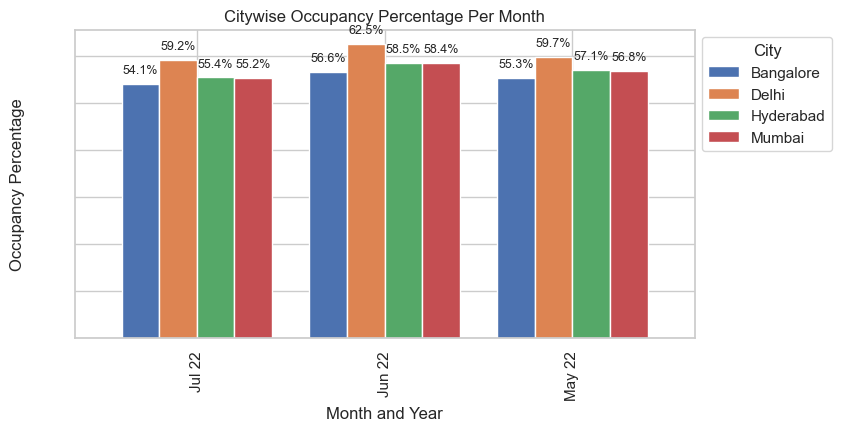

In [93]:
sns.set(style="whitegrid")
df_citywise_occupancy_per_month = df.groupby(['mmm yy', 'city'])['occ_pct'].mean().round(1).unstack()

ax = df_citywise_occupancy_per_month.plot(kind='bar', stacked=False, figsize=(8, 4), width=0.8)

# Add '%' to y-axis tick labels
yticks = ax.get_yticks()
yticklabels = []

for x in yticks:
    yticklabels.append('{}%'.format(int(x)))

ax.set_yticklabels(yticklabels,color='white')

# Add data labels to each column with rounded values
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format(height), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=9)

# Add title and labels
plt.title('Citywise Occupancy Percentage Per Month')
plt.xlabel('Month and Year')
plt.ylabel('Occupancy Percentage')

# Add legend
ax.legend(title='City', loc='upper left', bbox_to_anchor=(1, 1))

**Conclusion**:

**1.As we can see In all three months,Delhi shows highest level of room occupancy.**

**2.Hyderabad and Mumbai hotels doesn't show much difference in monthly occupancy rate.**

**3.bangalore has least occupancy rate among all the cities throughout all three months.**

**Question 5:**

**YOUR BUSINESS MANAGER HAS GIVEN YOU A NEW DATAFRAME FOR AUGUST MONTH, COMBINE IT WITH THE EXISTING DATAFRAME TO UPDATE THE DATAFRAME.**


*Step-1: After uploading the new August DataFrame,first we checked the column of the new August DataFrame since concatenation requires the same similar column counts and names.*

*Step-2: After that attempted the concatenation of august data with df DataFrame.*

*Step-3: Stored the new values in a new DataFrame and named it 'updated_df.*

In [94]:
df_august=pd.read_csv('D:\\new_data_august.csv')
df_august

print(df_august.columns)
print(df.columns)

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')
Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')


In [95]:
updated_df=pd.concat([df,df_august],ignore_index=True,axis=0)
updated_df.tail(20)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6487,19559,31-Jul-22,RT4,2,3.0,66.67,Presidential,Atliq Exotica,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6488,19561,31-Jul-22,RT1,21,36.0,58.33,Standard,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6489,19561,31-Jul-22,RT2,24,45.0,53.33,Elite,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6490,19561,31-Jul-22,RT3,18,29.0,62.07,Premium,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6491,19561,31-Jul-22,RT4,4,7.0,57.14,Presidential,Atliq Blu,Luxury,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6492,17564,31-Jul-22,RT1,8,16.0,50.00,Standard,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6493,17564,31-Jul-22,RT2,19,40.0,47.50,Elite,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6494,17564,31-Jul-22,RT3,11,24.0,45.83,Premium,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,17564,31-Jul-22,RT4,10,17.0,58.82,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,18560,31-Jul-22,RT1,22,30.0,73.33,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN


**Conclusion**:

**We have only week 32 Data of August,the data can be incomplete.**

**Question 6:**

**SHOW THE TREND IN SUCCESSFUL BOOKINGS IN AUGUST IN EACH CITY.**

*Step-1: extracted the August month information from df DataFrame and saved it to a new DataFrame,august_bookings.*

*Step-2: Grouped by 'city' on the august_bookings DataFrame and calculated the average bookings.*

*Step-3: Visualized the trend.*

In [96]:
august_bookings=updated_df[updated_df['mmm yy']=='Aug-22']
august_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6500,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [97]:
trend_data = august_bookings.groupby('city')['successful_bookings'].mean().round(1)
trend_data

city
Bangalore    23.5
Mumbai       19.3
Name: successful_bookings, dtype: float64

Text(0, 0.5, 'Mean Successful Bookings')

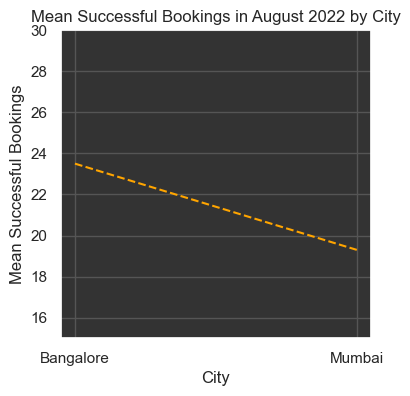

In [114]:
sns.set(style="whitegrid")

# Create a line plot
sns.set(style="darkgrid", rc={"axes.facecolor": "#333333", "grid.color": "#555555"})

plt.figure(figsize=(4, 4))
sns.lineplot(x=trend_data.index, y=trend_data.values,linestyle='dashed',color='orange')
plt.ylim(15, 30)
# Add title and labels
plt.title('Mean Successful Bookings in August 2022 by City')
plt.xlabel('City')
plt.ylabel('Mean Successful Bookings')

**Conclusion**:

**1.We have august data for two cities only, Mumbai and Bangalore.**

**2.The number of average successful bookings has seen a sharp drop from Bangalore to Mumbai (23.5 to 19.3).**

**Question 7:**

**CALCULATE THE REVENUE REALIZED PER CITY.**

*Step-1: merged the Revenue realized(df_bookings DataFrame) and city(df_hotels DataFrame) on 'property_id',stored it in a new df,df_bookings_all.*

*Step-2: Grouped by 'city' and calculated sum of the Revenue realized,converted it to millions and rounded the value.*

*Step-3: Visualized the result using bar chart.*

In [99]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on='property_id')
df_bookings_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [62]:
revenue_realized_in_mln=((df_bookings_all.groupby('city')['revenue_realized'].sum())/1e6).round(2)
revenue_realized_in_mln

city
Bangalore    420.38
Delhi        294.40
Hyderabad    325.18
Mumbai       668.57
Name: revenue_realized, dtype: float64

Text(0, 0.5, 'City')

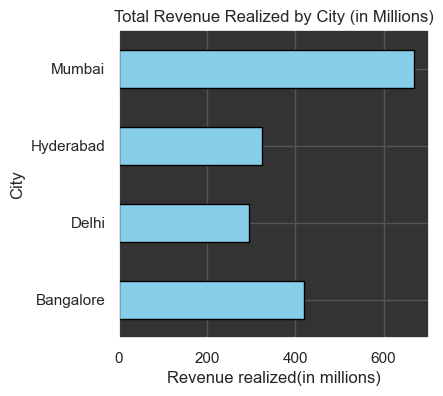

In [100]:
revenue_realized_in_mln=((df_bookings_all.groupby('city')['revenue_realized'].sum())/1e6).round(2)
ax = revenue_realized_in_mln.plot(kind='barh', color='skyblue', edgecolor='black', figsize=(4, 4))
plt.title('Total Revenue Generated per Month-Year (in Million)', fontsize=10)

plt.title('Total Revenue Realized by City (in Millions)')
plt.xlabel('Revenue realized(in millions)')
plt.ylabel('City')

**Conclusion:**
  
**1.Delhi has seen highest level of occupancy rate as well as least revenue realized,means,the number of cancelled bookings in Delhi hotels are least.**

**2.Mumbai has seen the highest amount of revenue realized,means the most number of cancelled bookings were done in Mumbai.**

**Question 8:**

**CALCULATE THE MONTH BY MONTH REVENUE.**

*Step-1: Checked the Datatype of df_bookings_all and df_date DataFrame,both 'check_in_date' and 'date' are 'object' datatype.*

*Step-2: converted the object datatype to Datetime datatype since we need to merge the two tables using the two datetime columns.*

*Step-3: Merged the two DataFrames and updated the df_bookings_all DataFrame.*

*Step-4: Grouped by 'mmm yy' column and calculated the revenue generated for each month,converted the value to millions and rounded it,stored the result in a new revenue_generated DataFrame.*

*Step-5: Created the column chart visual.*

In [105]:
df_bookings_all.info()
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13795 entries, 0 to 13794
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   booking_id         13795 non-null  object        
 1   property_id        13795 non-null  int64         
 2   booking_date       13795 non-null  object        
 3   check_in_date      13795 non-null  datetime64[ns]
 4   checkout_date      13795 non-null  object        
 5   no_guests          13795 non-null  float64       
 6   room_category      13795 non-null  object        
 7   booking_platform   13795 non-null  object        
 8   ratings_given      5673 non-null   float64       
 9   booking_status     13795 non-null  object        
 10  revenue_generated  13795 non-null  int64         
 11  revenue_realized   13795 non-null  int64         
 12  property_name      13795 non-null  object        
 13  category           13795 non-null  object        
 14  city  

In [103]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], errors='coerce')
df_date['date']=pd.to_datetime(df_date["date"])
df_bookings_all.head(4)

C:\Users\HP\AppData\Local\Temp\ipykernel_12224\3356156343.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date']=pd.to_datetime(df_date["date"])


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [104]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [172]:
revenue_generated=((df_bookings_all.groupby('mmm yy')['revenue_generated'].sum())/1e6).round(1)
revenue_generated

mmm yy
Jul 22    71.5
Jun 22    62.3
May 22    71.6
Name: revenue_generated, dtype: float64

Text(0, 0.5, 'Revenue generated (in Million)')

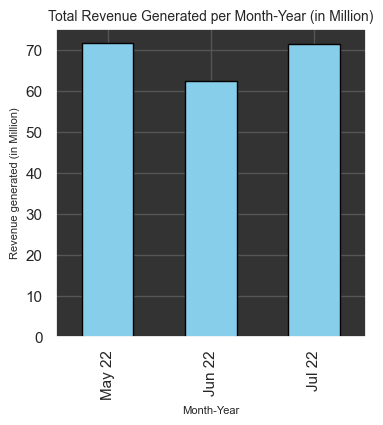

In [173]:
revenue_generated_in_mln=(df_bookings_all.groupby('mmm yy')['revenue_generated'].sum()/1e6).round(1)
revenue_generated_in_mln=revenue_generated_in_mln.sort_index(ascending=False)
ax = revenue_generated_in_mln.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(4, 4))
plt.title('Total Revenue Generated per Month-Year (in Million)', fontsize=10)

# Adding labels
plt.xlabel('Month-Year', fontsize=8)
plt.ylabel('Revenue generated (in Million)', fontsize=8)

**Conclusion:**

**The aggregate revenue across all the cities exhibits a near between May and July;however,the revenue for June(62.3 millions),at 71.6 million and 71.5 million respectively,significantly lags behind the figures for the other two months.**

**Question 9:**

**CALCULATE THE REVENUE REALIZED PER HOTEL TYPE.**

*Step-1: Merged the df_bookings and df_hotels DataFrames on 'property_id' and stored the result in a new DataFrame 'revenue_realized_hotel_type'.*

*Step-2: Grouped the 'revenue_realized_hotel_type' DataFrame with 'property_name' column and on top of it calculated the 'revenue_realized',converted it to millions and rouded it.*

*Step-3: Created the column chart visual.*

In [106]:
revenue_realized_hotel_type = pd.merge(df_bookings, df_hotels, on='property_id')
revenue_realized_hotel_type = (revenue_realized_hotel_type.groupby('property_name')['revenue_realized'].sum()/1e6).round(1)
revenue_realized_hotel_type

property_name
Atliq Bay        260.0
Atliq Blu        260.9
Atliq City       285.8
Atliq Exotica    320.3
Atliq Grands     211.5
Atliq Palace     304.1
Atliq Seasons     66.1
Name: revenue_realized, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Atliq Bay'),
  Text(1, 0, 'Atliq Blu'),
  Text(2, 0, 'Atliq City'),
  Text(3, 0, 'Atliq Exotica'),
  Text(4, 0, 'Atliq Grands'),
  Text(5, 0, 'Atliq Palace'),
  Text(6, 0, 'Atliq Seasons')])

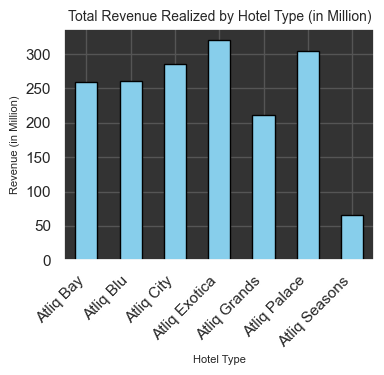

In [107]:
ax = revenue_realized_hotel_type.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(4,3))

# Adding a title
plt.title('Total Revenue Realized by Hotel Type (in Million)', fontsize=10)

# Adding labels
plt.xlabel('Hotel Type', fontsize=8)
plt.ylabel('Revenue (in Million)', fontsize=8)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

**Conclusion:**

**1.The Exotica type Hotels of AtliQ Industries has seen highest amount of revenue generated from cancellation followed by AtliQ Palace and AtliQ city.**

**2.The expensive hotels has seen more cancellation amount than normal and premium hotels.**

**3.AtliQ Seasons has demonstrated exceptional resilience in the face of cancellations, boasting the lowest cancellation rate at 66.1 million, significantly surpassing other hotel types. This notable achievement can be attributed to its competitive pricing strategy and strategically advantageous locations, contributing to a more appealing value proposition for customer.**

**Question 10:**

**PER CITY, WHAT IS THE AVERAGE RATING GIVEN?**

*Step-1: Merged the df_bookings and df_hotels DataFrames on 'property_id' and stored the result in a new DataFrame 'average_rating_by_customer'.*

*Step-2: Grouped the 'average_rating_by_customer' DataFrame with 'city' column and on top of it calculated the average of 'ratings_given',and rouded it.*

In [110]:
average_rating_by_customer=pd.merge(df_bookings,df_hotels,on='property_id')
average_rating_by_customer=average_rating_by_customer.groupby('city')['ratings_given'].mean().round(2)
average_rating_by_customer

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

**Conclusion:**

**1.The average ratings are almost same for all the cities.**

**2.None of the ratings are greater than or equal to 4.**

**3.Uniform average ratings across all cities suggest a need for comprehensive service quality review, with potential steps including staff training, amenity refinement, and tailored marketing to enhance overall customer satisfaction.**

**Question 11:**

**CALCULATE THE REVENUE REALIZED PER BOOKING PLATFORM.**

*Step-1: Merged the df_bookings and df_hotels DataFrames on 'property_id' and stored the result in a new DataFrame 'revenue_realized_booking_platform'.*

*Step-2: Grouped the 'revenue_realized_booking_platform' DataFrame with 'booking_platform' colmnn and on top of it calculated the 'revenue_realized',converted it to millions and rouded it.*

*Step-3: Created the pie chart visual.*

In [112]:
revenue_realized_booking_platform = pd.merge(df_bookings, df_hotels, on='property_id')
revenue_realized_booking_platform = (revenue_realized_booking_platform.groupby('booking_platform')['revenue_realized'].sum()/1e6).round(1)
revenue_realized_booking_platform

booking_platform
direct offline     86.4
direct online     168.9
journey           102.5
logtrip           187.5
makeyourtrip      340.8
others            699.3
tripster          123.1
Name: revenue_realized, dtype: float64

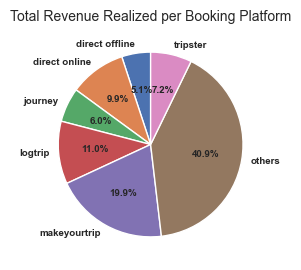

In [113]:
ax = revenue_realized_booking_platform.plot(kind='pie', figsize=(4, 3), autopct='%1.1f%%', startangle=90,textprops={'fontsize': 7, 'fontweight': 'bold'})

plt.title('Total Revenue Realized per Booking Platform', fontsize=10)

ax.set_ylabel('') #To hide the y-axis label

# Display the plot
plt.show()

**Conclusion:**

**1.Majority of the bookings(40.9%) are from 'others' type of transaction,unknown.**

**2.A strategic business step is suggested which would involve conducting a thorough analysis to categorize and understand the nature of these transactions, enabling targeted initiatives to capture valuable market segments.**